In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Image
import pandas as pd
from functions import formularz, click_button_moj, xgboost_check, xgboost_model, xgboost_calosc, oblicz_cene, click_button_model
import functools
from ipywidgets import Layout

# AirBnB Seattle Price Analysis
## Cel projketu: stworzenie modelu do predykcji ceny wynajęcia lokali AirBnB w Seattle

Naszym celem biznesowym jest predykcja ceny za dzień wynajęcia lokalu o wybranych parametrach.  
host -> będzie mógł określić cenę wynajęcia swojego lokalu o danych parametrach.  
najemca -> będzie mógł sprawdzić jaka powinna być cena za wynajęcie lokalu o danych parametrach.  

metryka sukcesu???

## Oryginalny dataset

In [33]:
df_orig = pd.read_csv('../data/listings.csv')

### Zmienne

In [31]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Statytyki

In [32]:
df_orig.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


## Selekcja danych

In [34]:
df = pd.read_csv('../data/data_minus_outliers_20200708_min.csv')

### Data cleaning
- czyszczenie, brakujące i odstające wartości

### Metody doboru zmiennych do modelu

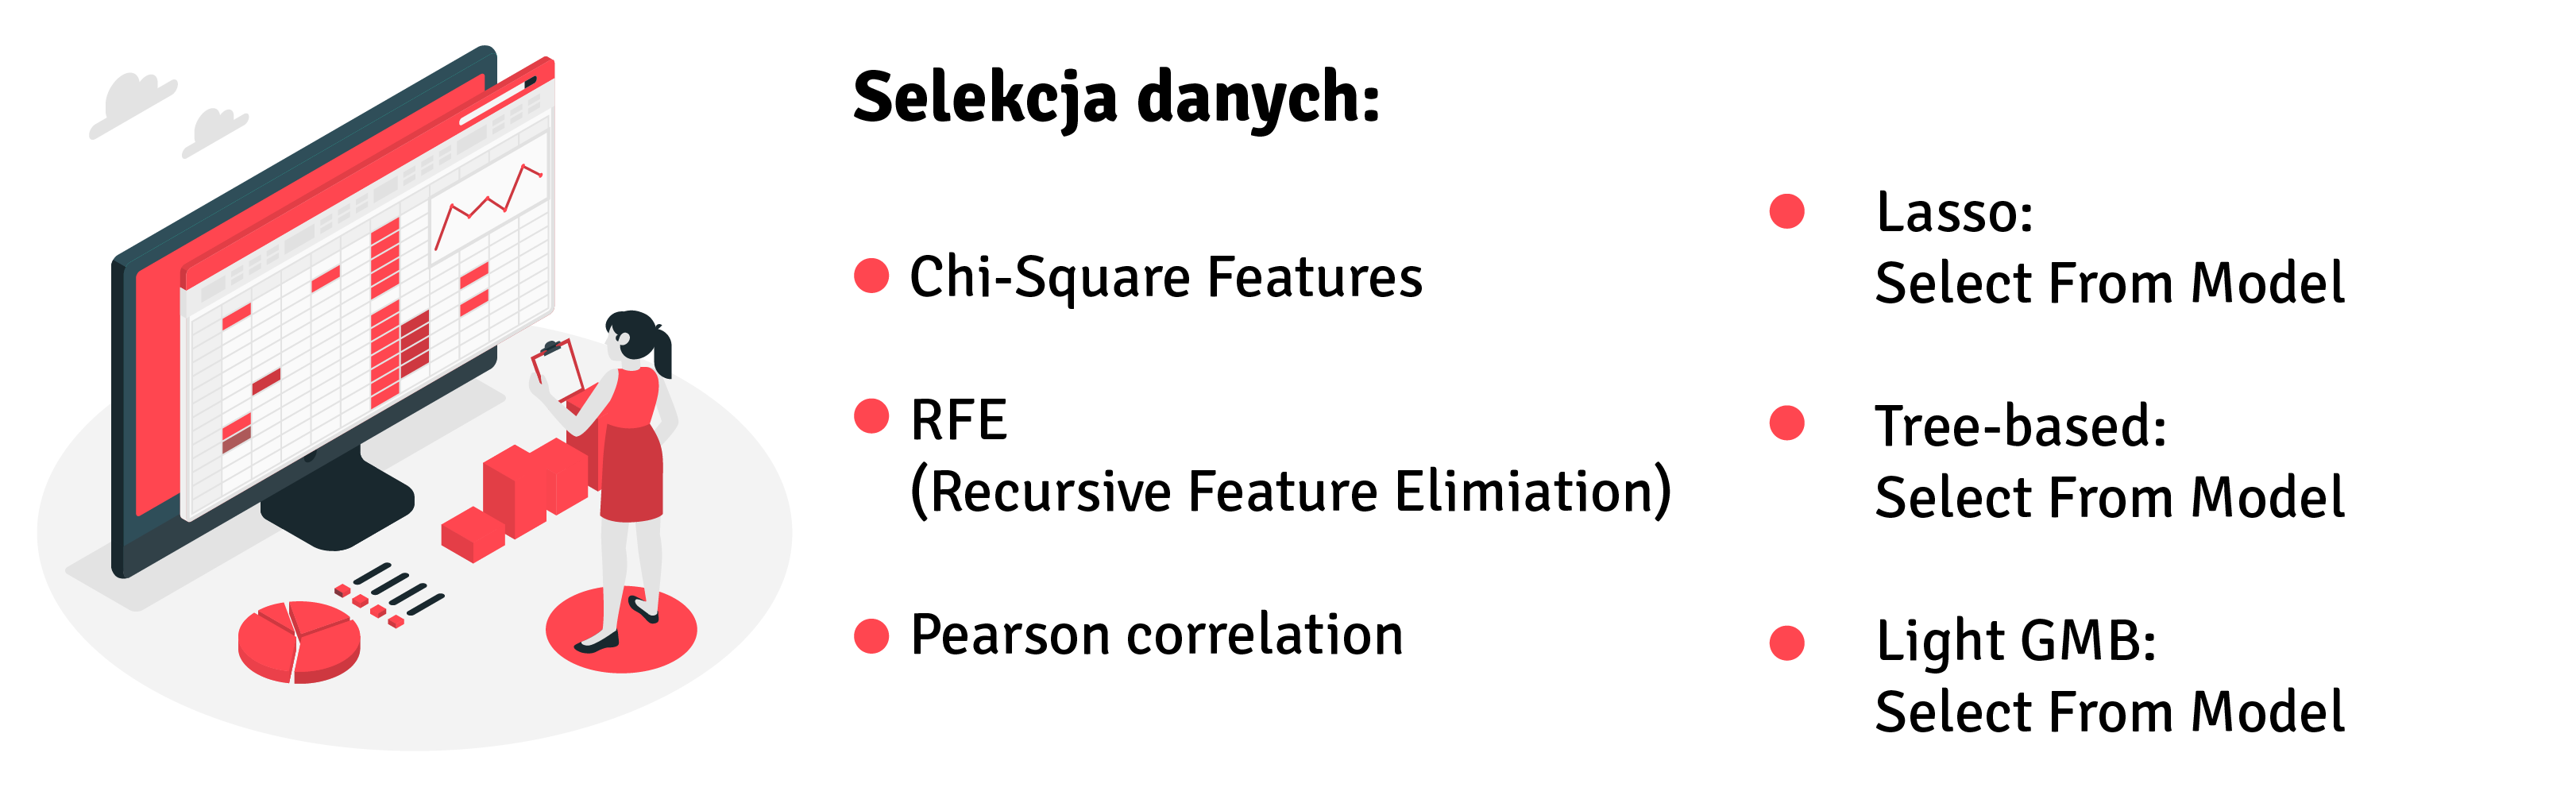

In [18]:
display(Image(filename='../graphics/app/airbnb-04.png'))

In [16]:
pd.read_csv('../data_preparation/feature_selection_df.csv')

,Unnamed: 0,Feature,Pearson,RFE,Logistics,Random Forest,LightGBM,Total
0,1,cleaningfee,True,True,True,True,True,5
1,2,accommodates,True,True,True,True,True,5
2,3,roomtypeEntirehomeapt,True,True,True,False,True,4
3,4,guestsincluded,True,True,True,True,False,4
4,5,bedrooms,True,True,True,False,True,4
...,...,...,...,...,...,...,...,...
58,59,bedtypeRealBed,False,False,False,False,False,0
59,60,bedtypePulloutSofa,False,False,False,False,False,0
60,61,bedtypeFuton,False,False,False,False,False,0
61,62,bedtypeCouch,False,False,False,False,False,0


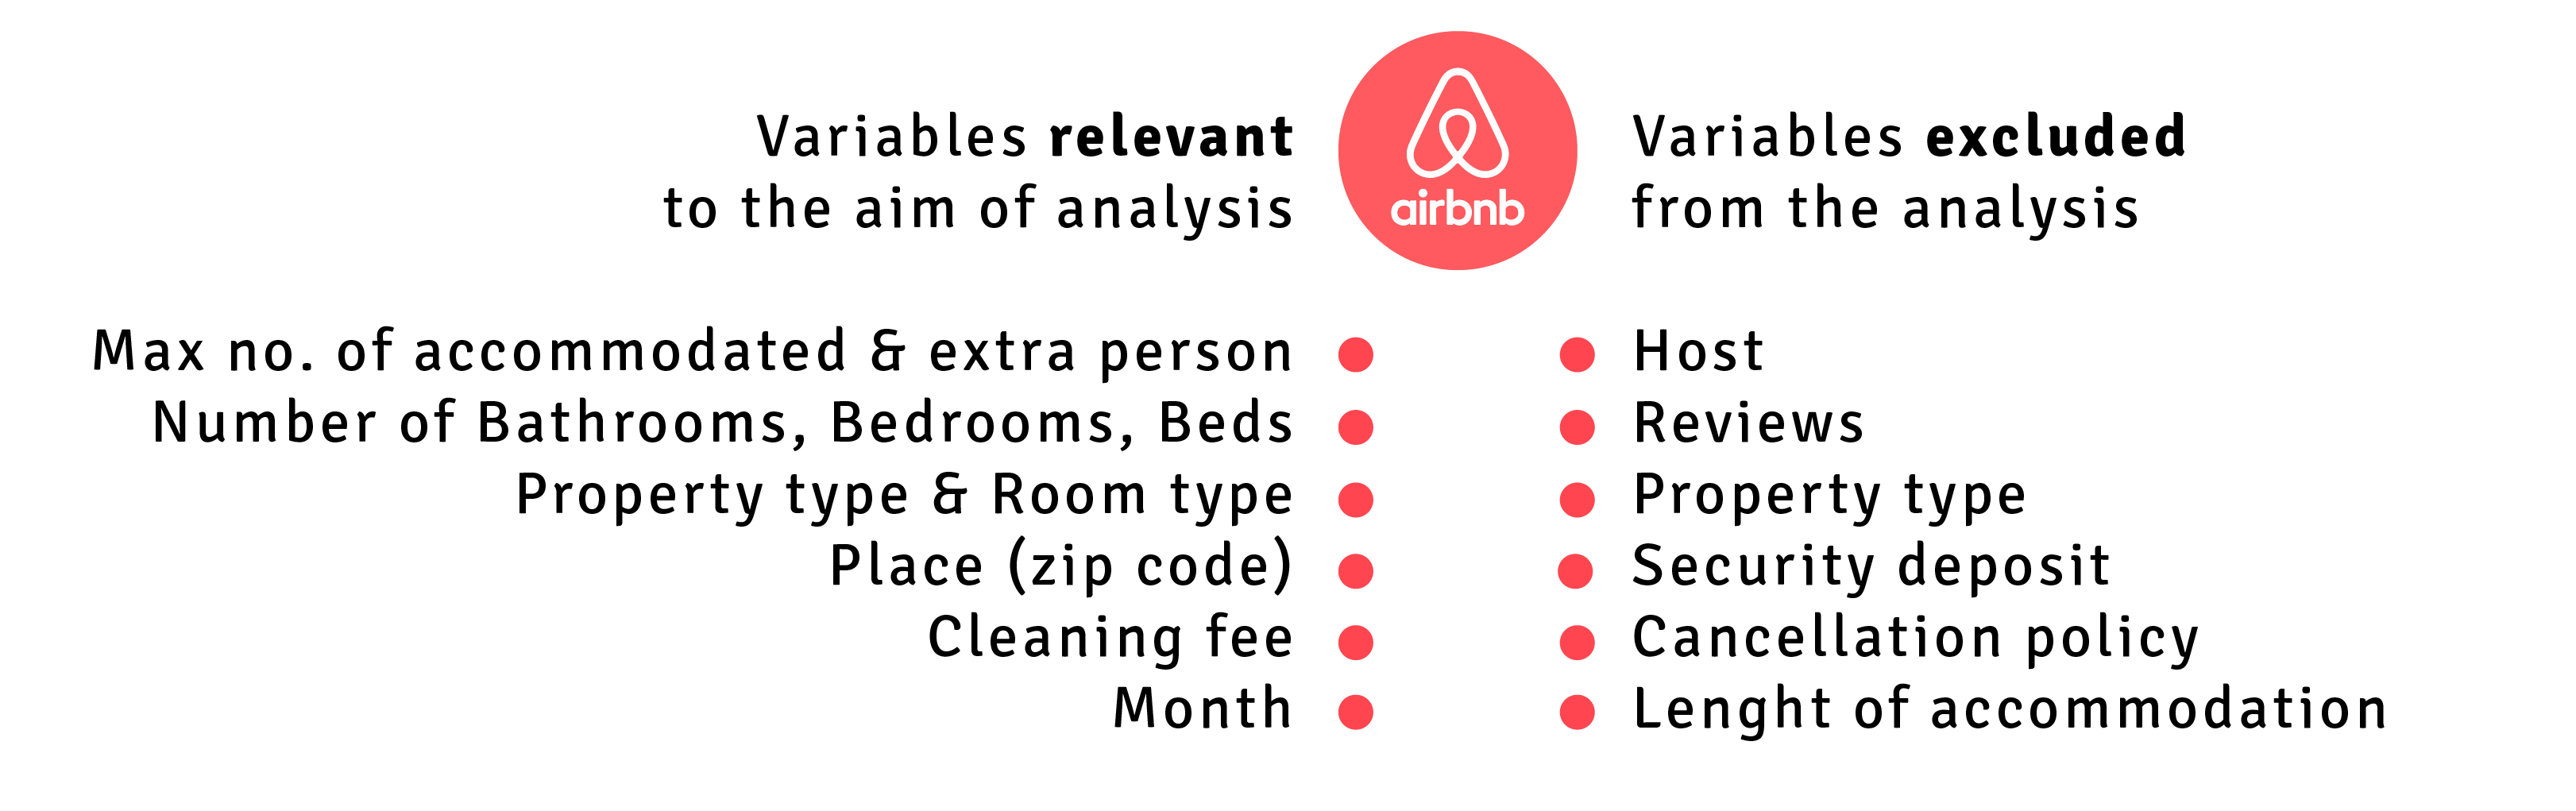

In [19]:
display(Image(filename='../graphics/app/airbnb-05.png'))

### Heatmaps
- korelacja zmiennych + heatmapy + wykresy

## Modelowanie

### Przegląd wyników modeli na domyślnych parametrach

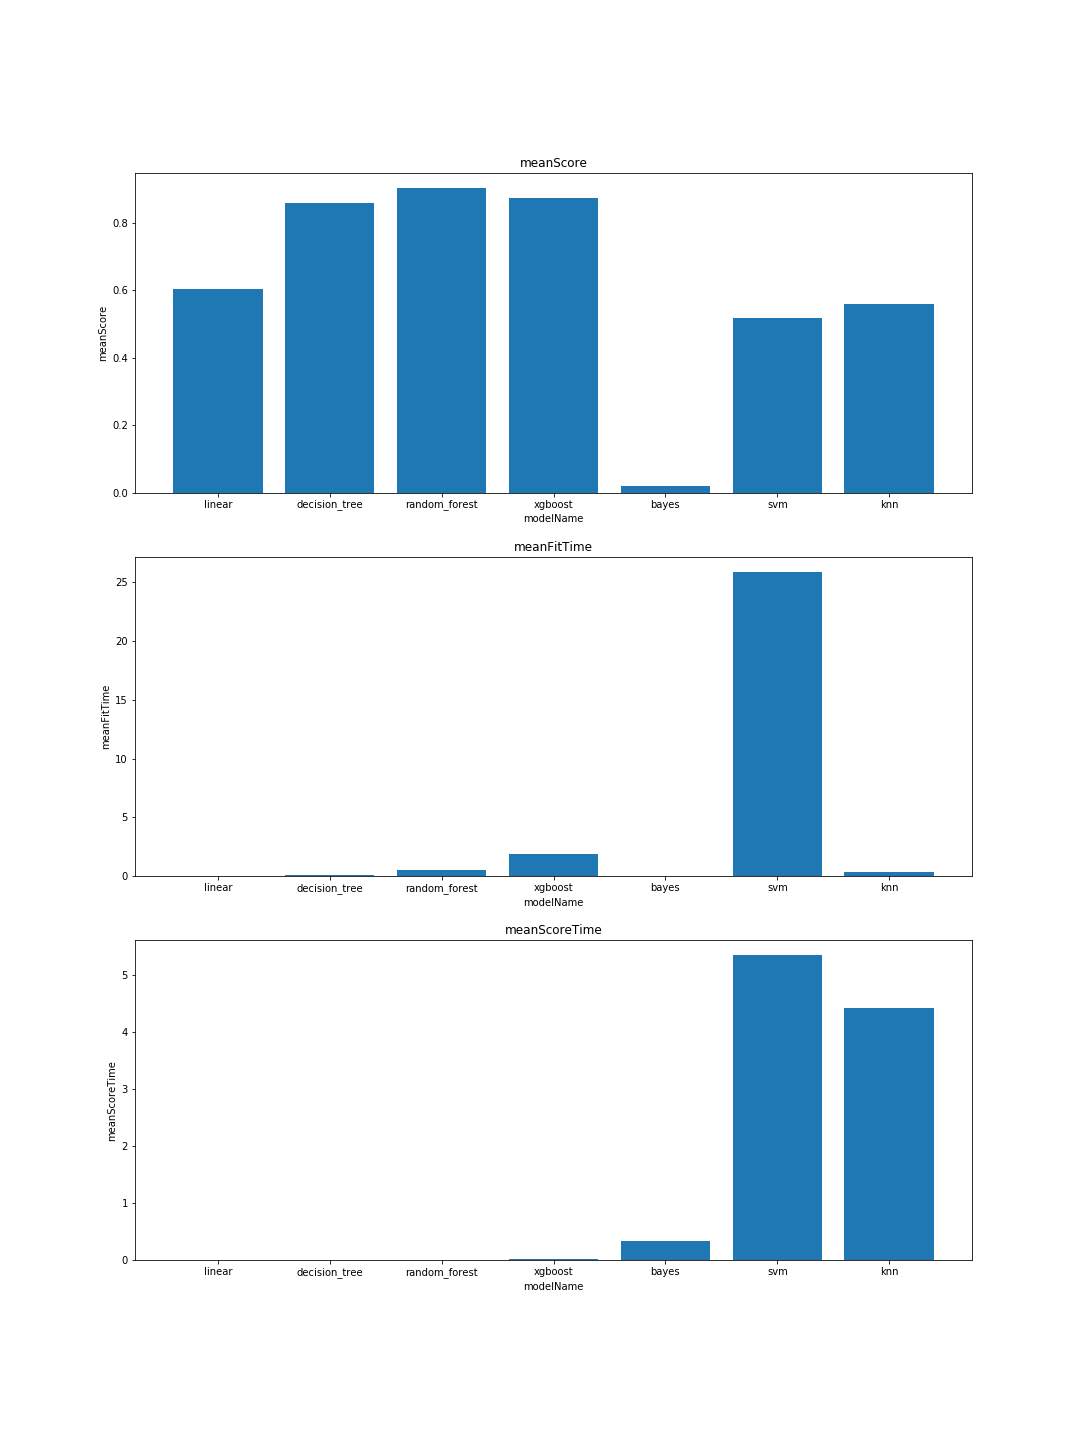

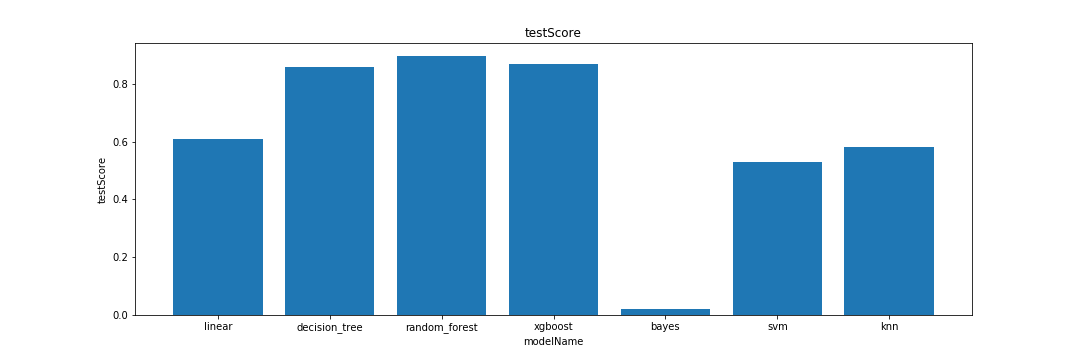

In [3]:
display(Image(filename='porownanie_modeli_R2_i_czas.png'))
display(Image(filename='porownanie_modeli_test_score.png'))

### Tunning modeli
najlepsze wyniki wraz z ustawieniami hiperparametrów dla poszczególnych modeli + wykresy

RANDOM FOREST

XGBRegressor  
- objective="reg:squarederror"
- n_estimators=325
- max_depth= 10
- eta= 0.2
- learning_rate= 0.2
- min_child_weight= 3
- gamma=0.9
- colsample_bytree = 0.9 
- colsample_bylevel = 1
- colsample_bynode = 1
- subsample= 1
- reg_lambda=1
- reg_alpha=100
- max_delta_step=0
- tree_method='auto'

In [13]:
xg_model = xgboost_model()

SVM

KNN

### Najepszy model
- wbrany model
- skuteczność modelu na danych testowych
- wnioski z naszych analiz modeli

# APLIKACJA

In [22]:
button_moj = widgets.Button(description='Pokaż wynik', button_style='danger')
button_moj.on_click(click_button_moj)
#button_moj.on_click(functools.partial(click_button_moj, xg)) <- to nie działa
formularz()
display(button_moj) # to liczy się wolno, bo za każdym razem trenuje model

Button(button_style='danger', description='Pokaż wynik', style=ButtonStyle())


Zip code: 98106, Month: July, Property type: Apartment, Room type: Entire_Home_apt
Minimum nights: 1, Accommodates: 2, Bathrooms: 1, Bedrooms: 2, Beds: 2
Cleaning_fees: 50, Guests_included: 0, Extra_people: True
Przewidywana cena: [270.63037]

Zip code: 98106, Month: July, Property type: Apartment, Room type: Entire_Home_apt
Minimum nights: 7, Accommodates: 2, Bathrooms: 1, Bedrooms: 2, Beds: 2
Cleaning_fees: 50, Guests_included: 0, Extra_people: True
Przewidywana cena: [255.5497]

Zip code: 98106, Month: July, Property type: Apartment, Room type: Private_room
Minimum nights: 7, Accommodates: 2, Bathrooms: 1, Bedrooms: 2, Beds: 2
Cleaning_fees: 50, Guests_included: 0, Extra_people: True
Przewidywana cena: [255.97348]


In [12]:
oblicz_cene(model=xgboost) # to liczby się szybko, bo korzysta z modelu wytrenowanego już w tym notatniku


Zip code: 98101, Month: January, Property type: Apartment, Room type: Entire_Home_apt
Minimum nights: 1, Accommodates: 1, Bathrooms: 1, Bedrooms: 1, Beds: 1
Cleaning_fees: 50, Guests_included: 0, Extra_people: False
Przewidywana cena: [186.67514]
